# Perro

In [80]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [3]:
data = pd.read_excel('Cell-Cycle-Set.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
Gene_Name          499 non-null object
mean_RNA_G1        499 non-null float64
mean_RNA_S         499 non-null float64
mean_RNA_G2        499 non-null float64
mean_protein_G1    495 non-null float64
mean_protein_S     494 non-null float64
mean_protein_G2    493 non-null float64
GOBP               438 non-null object
GOMF               466 non-null object
GOCC               466 non-null object
dtypes: float64(6), object(4)
memory usage: 39.1+ KB


In [76]:
data.head(2)

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...


In [6]:
data.describe()

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
count,499.000000,499.000000,499.000000,495.000000,494.000000,493.000000
mean,11.114732,11.086037,11.157963,25.148932,22.640491,25.391696
std,1.497627,1.499159,1.479490,3.214128,3.204506,3.134967
min,4.656117,4.575568,4.659767,16.908420,13.586840,16.788360
25%,10.078068,10.091472,10.152937,22.760463,20.281830,23.203960
50%,11.154997,11.150400,11.246717,25.092567,22.629350,25.408067
75%,12.162392,12.145070,12.193988,27.176765,24.750146,27.436273
max,14.698987,14.675727,14.677780,33.461600,31.264897,33.765947


In [7]:
data = data.dropna(how='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 1 to 498
Data columns (total 10 columns):
Gene_Name          397 non-null object
mean_RNA_G1        397 non-null float64
mean_RNA_S         397 non-null float64
mean_RNA_G2        397 non-null float64
mean_protein_G1    397 non-null float64
mean_protein_S     397 non-null float64
mean_protein_G2    397 non-null float64
GOBP               397 non-null object
GOMF               397 non-null object
GOCC               397 non-null object
dtypes: float64(6), object(4)
memory usage: 34.1+ KB


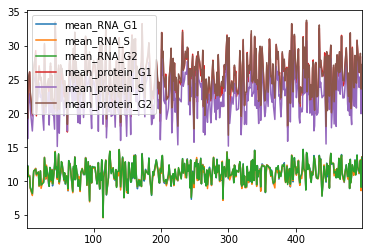

In [8]:
data.plot()

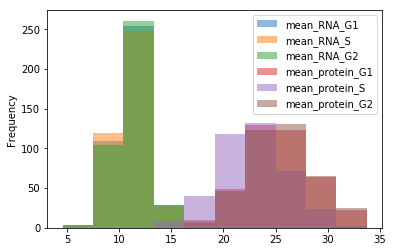

In [9]:
data.plot.hist(alpha=0.5)

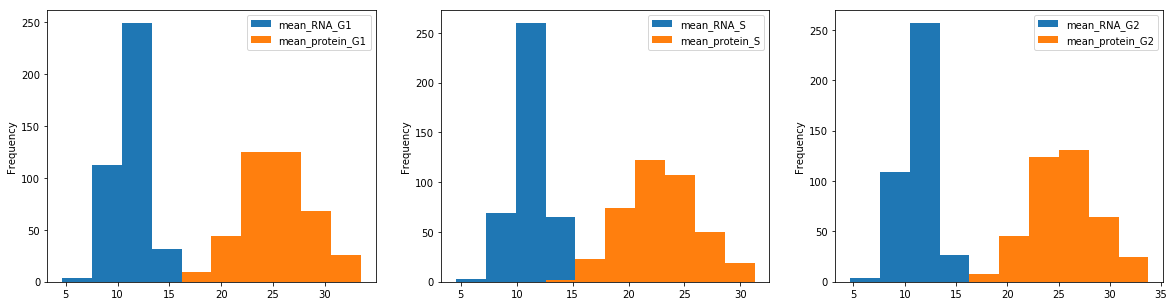

In [10]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))
data.loc[:,['mean_RNA_G1', 'mean_protein_G1']].plot.hist(ax=axs[0])
data.loc[:,['mean_RNA_S', 'mean_protein_S']].plot.hist(ax=axs[1])
data.loc[:,['mean_RNA_G2', 'mean_protein_G2']].plot.hist(ax=axs[2])

In [11]:
data.corr()

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.991063,0.992023,0.522658,0.541428,0.544206
mean_RNA_S,0.991063,1.000000,0.986836,0.514705,0.536190,0.534322
mean_RNA_G2,0.992023,0.986836,1.000000,0.510364,0.529690,0.532565
mean_protein_G1,0.522658,0.514705,0.510364,1.000000,0.970289,0.977016
mean_protein_S,0.541428,0.536190,0.529690,0.970289,1.000000,0.975964
mean_protein_G2,0.544206,0.534322,0.532565,0.977016,0.975964,1.000000


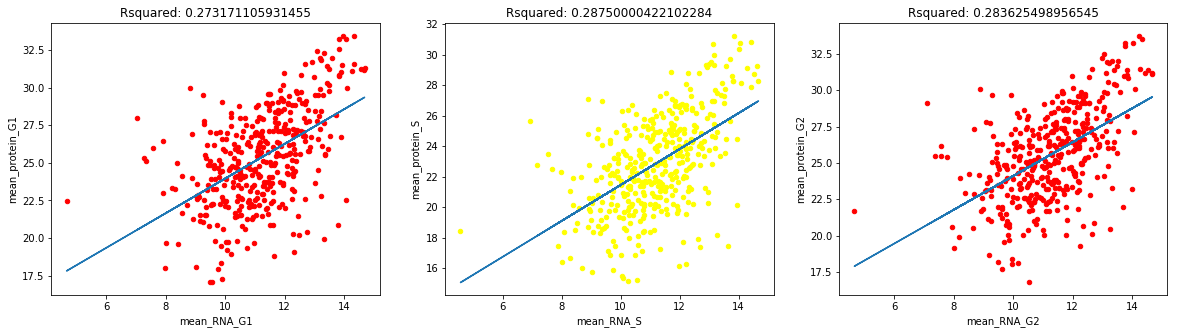

In [41]:
results1 = smf.ols('mean_protein_G1 ~ mean_RNA_G1', data=data).fit()
results2 = smf.ols('mean_protein_S ~ mean_RNA_S', data=data).fit()
results3 = smf.ols('mean_protein_G2 ~ mean_RNA_G2', data=data).fit()

fig, axs = plt.subplots(1,3, figsize=(20, 5))
data.plot.scatter(x='mean_RNA_G1', y='mean_protein_G1', ax=axs[0], color='Red');
axs[0].plot(data['mean_RNA_G1'], results1.fittedvalues)
axs[0].set_title('Rsquared: '+str(results1.rsquared));
data.plot.scatter(x='mean_RNA_S',  y='mean_protein_S',  ax=axs[1], color='Yellow');
axs[1].plot(data['mean_RNA_S'], results2.fittedvalues)
axs[1].set_title('Rsquared: '+str(results2.rsquared));
data.plot.scatter(x='mean_RNA_G2', y='mean_protein_G2', ax=axs[2], color='Red');
axs[2].plot(data['mean_RNA_G2'], results3.fittedvalues)
axs[2].set_title('Rsquared: '+str(results3.rsquared))

There's a **not-neat correlation** (R^2 ~ 0.3) because of different factors, such as:
- The imprecision of measuring tools
- The differences in proteins lifespan
- Complex interaction between proteins

----------

## Week 2

### 1. Find all guys that contain 'cell cycle in GOBP

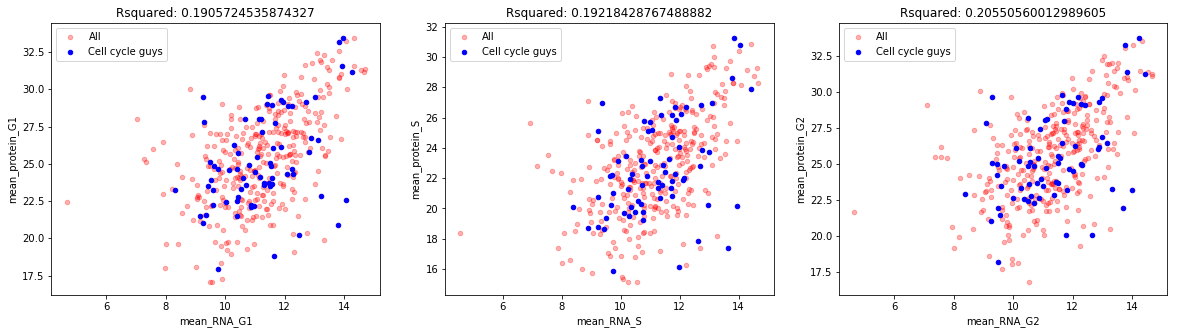

In [49]:
cell_cycle_guys = data[data['GOBP'].str.contains('cell cycle')]

results1cc = smf.ols('mean_protein_G1 ~ mean_RNA_G1', data=cell_cycle_guys).fit()
results2cc = smf.ols('mean_protein_S ~ mean_RNA_S', data=cell_cycle_guys).fit()
results3cc = smf.ols('mean_protein_G2 ~ mean_RNA_G2', data=cell_cycle_guys).fit()

fig, axs = plt.subplots(1,3, figsize=(20, 5))

data.plot.scatter(x='mean_RNA_G1', y='mean_protein_G1', ax=axs[0], color='Red', label='All', alpha=0.3);
cell_cycle_guys.plot.scatter(x='mean_RNA_G1', y='mean_protein_G1', ax=axs[0], color='Blue', label='Cell cycle guys');
axs[0].set_title('Rsquared: '+str(results1cc.rsquared));

data.plot.scatter(x='mean_RNA_S',  y='mean_protein_S',  ax=axs[1], color='Red', label='All', alpha=0.3);
cell_cycle_guys.plot.scatter(x='mean_RNA_S',  y='mean_protein_S',  ax=axs[1], color='Blue', label='Cell cycle guys');
axs[1].set_title('Rsquared: '+str(results2cc.rsquared));

data.plot.scatter(x='mean_RNA_G2', y='mean_protein_G2', ax=axs[2], color='Red', label='All', alpha=0.3);
cell_cycle_guys.plot.scatter(x='mean_RNA_G2', y='mean_protein_G2', ax=axs[2], color='Blue', label='Cell cycle guys');
axs[2].set_title('Rsquared: '+str(results3cc.rsquared));


### 2. Find the guys that contain 'ribosome' in their GOCC

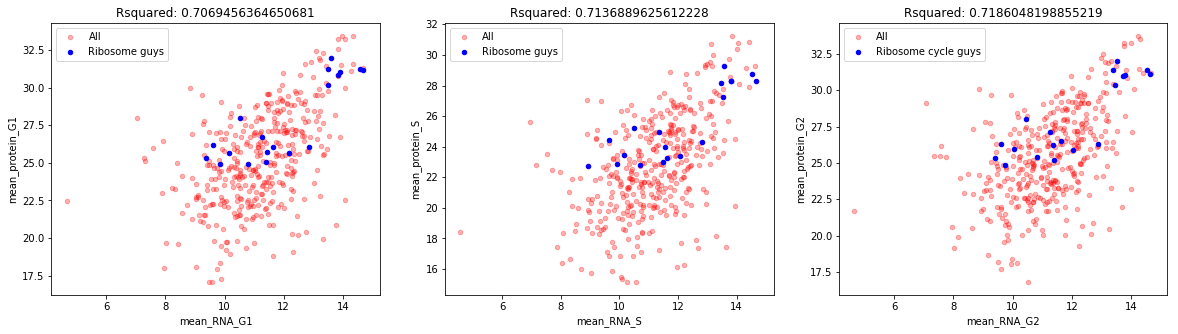

In [48]:
ribosome_guys = data[data['GOCC'].str.contains('ribosome')]

results1cc = smf.ols('mean_protein_G1 ~ mean_RNA_G1', data=cell_cycle_guys).fit()
results2cc = smf.ols('mean_protein_S ~ mean_RNA_S', data=cell_cycle_guys).fit()
results3cc = smf.ols('mean_protein_G2 ~ mean_RNA_G2', data=cell_cycle_guys).fit()

fig, axs = plt.subplots(1,3, figsize=(20, 5))

data.plot.scatter(x='mean_RNA_G1', y='mean_protein_G1', ax=axs[0], color='Red', label='All', alpha=0.3);
ribosome_guys.plot.scatter(x='mean_RNA_G1', y='mean_protein_G1', ax=axs[0], color='Blue', label='Ribosome guys');
axs[0].set_title('Rsquared: '+str(results1cc.rsquared));

data.plot.scatter(x='mean_RNA_S',  y='mean_protein_S',  ax=axs[1], color='Red', label='All', alpha=0.3);
ribosome_guys.plot.scatter(x='mean_RNA_S',  y='mean_protein_S',  ax=axs[1], color='Blue', label='Ribosome guys');
axs[1].set_title('Rsquared: '+str(results2cc.rsquared));

data.plot.scatter(x='mean_RNA_G2', y='mean_protein_G2', ax=axs[2], color='Red', label='All', alpha=0.3);
ribosome_guys.plot.scatter(x='mean_RNA_G2', y='mean_protein_G2', ax=axs[2], color='Blue', label='Ribosome cycle guys');
axs[2].set_title('Rsquared: '+str(results3cc.rsquared));


The *ribosomes* dots form two distinct clusters prevalent in the three stages of the cell cycle.

### 3. Count the number of occurrences of every GOBP term across all genes

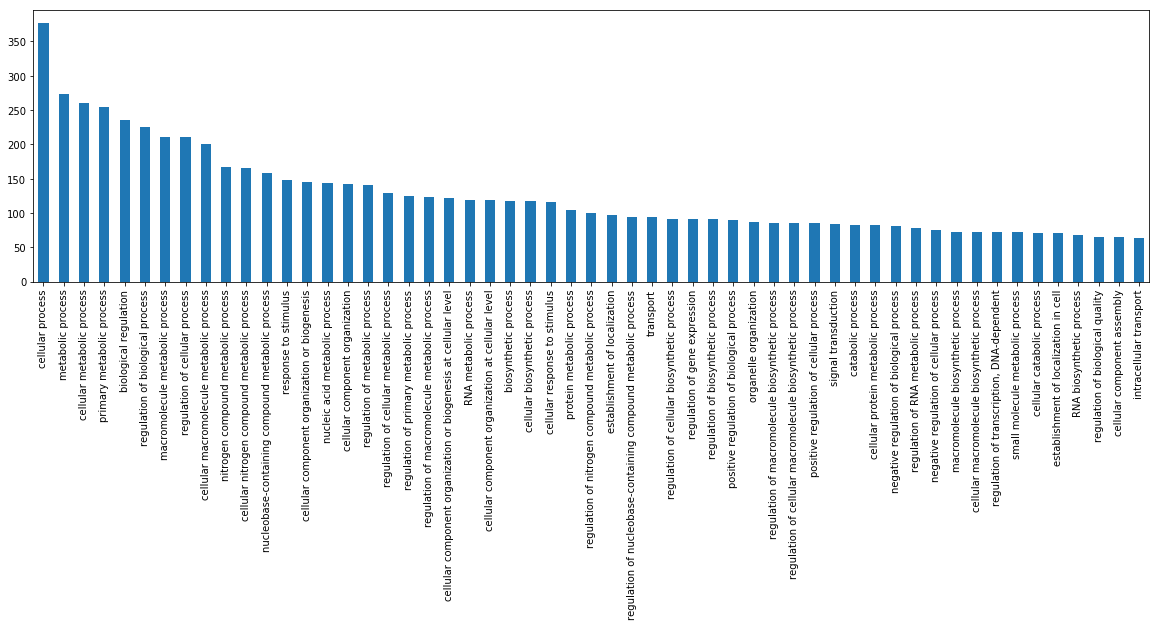

In [67]:
counts = data['GOBP'].str.split(';',expand=True).stack().value_counts()
counts[0:55].plot.bar(figsize=(20, 5))

### 4. Calculate the change in mRNA/protein level across the cell cycle

 by taking the difference at each stage (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling. Repeat tasks 1 and 2 by plotting the changes in levels with GOBP/GOCC labelling. What do we notice about changes in the cell cycle? Is there any apparent clustering of GO terms?

In [75]:
data.head(2)

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...


In [94]:
G1_S = data.mean_RNA_G1 - data.mean_RNA_S
S_G2 = data.mean_RNA_S - data.mean_RNA_G2
G2_G1 = data.mean_RNA_G2 - data.mean_RNA_G1

diff = pd.DataFrame({'G1_S': G1_S, 'S_G2': S_G2, 'G2_G1': G2_G1})
    
scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(diff)
diff_norm = pd.DataFrame(np_scaled)
